## Notes

• All of the following calculations are conditional on race/ethnicity. That is, the calculation described below is carried out separately for each race.

• The figures/tables containing the data can be found here:
https://www.federalreserve.gov/boarddocs/rptcongress/creditscore/figures.htm.

• We will be analyzing
- "Figure_7.A._TransRisk_Score_Cumulative_Percentage_of_Goods_and_Bads,_by_Demographic_Group(Random-Account_Performance)_-_Race_or_ethnicity_(SSA_data)"
- "Figure 3.A. TransRisk Score: Cumulative Percentage, by Demographic Group (SSA data)" 

## Calculations

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
totalData = pd.read_csv("Figure7A.csv")
CumulativeData = pd.read_csv("Figure3A.csv")

In [2]:
%matplotlib inline

### Step 1) Calculating π
Notes: Will be calculating pi for inequality data (cumulative probabilities) and the non-cumulative data, then finding the best value for pi by comparing the means and the pi value at a score of 50 (half way point)

*** If I calculate pi with the inequality data: ***

In [3]:
# Get the dataframe that holds the cumulative percentage, by demographic group
def getPD(data, col, raceName):
    pd = data["Score"].to_frame(name="Score")
    race = np.full(len(data), raceName)
    pd["Demographic"] = race
    pd["Percentage"] = data[col]
    return pd

whites = getPD(CumulativeData, "White", "white")
blacks = getPD(CumulativeData, "Black", "black")
asians = getPD(CumulativeData, "Asian", "asian")
hispanics = getPD(CumulativeData, "Hispanic", "hispanic")
pds = [whites, blacks, asians, hispanics]
cumulative = pd.concat(pds)

In [4]:
def getPis(dataset, raceSet, goodName, badName):
    good = dataset.set_index("Score")[goodName]
    bad = dataset.set_index("Score")[badName]
    total = raceSet.set_index("Score").Percentage
    return ((total - bad) / (good - bad)).fillna(value=0)

In [5]:
asianPi = getPis(totalData, asians, "Asian (Good)", "Asian (Bad)")
whitePi = getPis(totalData, whites, "White (Good)", "White (Bad)")
blackPi = getPis(totalData, blacks, "Black (Good)", "Black (Bad)")
hispanicPi = getPis(totalData, hispanics, "Hispanic (Good)", "Hispanic (Bad)")

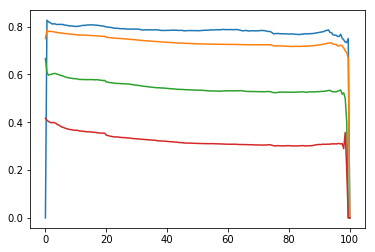

In [6]:
#pi with inequality values
plt.plot(asianPi)
plt.plot(whitePi)
plt.plot(hispanicPi)
plt.plot(blackPi)

In [7]:
#pi for each demographic if I choose the mean value with inequalites
asianPi.mean(), whitePi.mean(), hispanicPi.mean(), blackPi.mean()

(0.7778627963889763,
 0.7331253694683577,
 0.5407805362887502,
 0.32228162064873733)

In [8]:
#pi for each demographic if I choose the value at score 50 with inequalities
asianPi[50], whitePi[50], hispanicPi[50], blackPi[50]

(0.78271983640081788,
 0.72788697788697787,
 0.53443983402489637,
 0.31168177240684786)

*** If I calculate pi with the non-cumulative data ***

In [9]:
def getPisNonCumulative(dataset, raceSet, goodName, badName):
    good = dataset.set_index("Score")[goodName].diff().fillna(value=0)
    bad = dataset.set_index("Score")[badName].diff().fillna(value=0)
    total = raceSet.set_index("Score")["Percentage"].diff().fillna(value=0)
    return ((total - bad) / (good - bad)).fillna(value=0)

In [10]:
whitePiTwo = getPisNonCumulative(totalData, whites, "White (Good)", "White (Bad)")
blackPiTwo = getPisNonCumulative(totalData, blacks, "Black (Good)", "Black (Bad)")
asianPiTwo = getPisNonCumulative(totalData, asians, "Asian (Good)", "Asian (Bad)")
hispanicPiTwo = getPisNonCumulative(totalData, hispanics, "Hispanic (Good)", "Hispanic (Bad)")

In [11]:
whitePiTwo[30:40]

Score
30.0    5.945946e-01
30.5    6.451613e-01
31.0    5.882353e-01
31.5    5.238095e-01
32.0    5.000000e-01
32.5    6.000000e-01
33.0    5.294118e-01
33.5    2.368476e-13
34.0    5.555556e-01
34.5   -1.184238e-13
35.0    5.000000e-01
35.5    5.000000e-01
36.0    1.500000e+00
36.5    1.000000e+00
37.0    1.058824e+00
37.5    2.000000e+00
38.0    1.166667e+00
38.5    1.000000e+00
39.0   -4.000000e+00
39.5   -1.608428e+12
40.0    1.100000e+00
dtype: float64

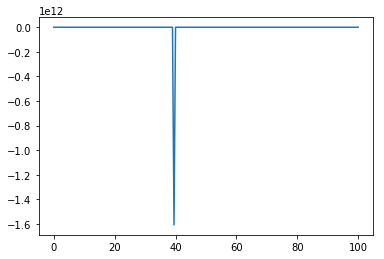

In [12]:
#pi with equality values (all of the plots are a little bit weird for this one because there are negative diff values
#and rounding error for the whitePiTwo)
# plt.plot(blackPiTwo)
# plt.plot(asianPiTwo)
plt.plot(whitePiTwo)
# plt.plot(hispanicPiTwo)

In [13]:
#value of pi for non cumulative data with mean values
whitePiTwo.mean(), blackPiTwo.mean(), asianPiTwo.mean(), hispanicPiTwo.mean()

(-8123375950.528774,
 0.32642509048604285,
 0.7913702820010068,
 0.5063311172908808)

In [14]:
#value of pi for non cumulative data with selecting score of 50
whitePiTwo[50], blackPiTwo[50], asianPiTwo[50], hispanicPiTwo[50]

(0.77551020408163152,
 0.29896907216495305,
 0.80645161290323375,
 0.54545454545453709)

In [15]:
# comparing pi values to find the best ones with a score of 50:
whitePiTwo[50], whitePi[50], blackPiTwo[50], blackPi[50], asianPiTwo[50], asianPi[50], hispanicPiTwo[50], hispanicPi[50]

(0.77551020408163152,
 0.72788697788697787,
 0.29896907216495305,
 0.31168177240684786,
 0.80645161290323375,
 0.78271983640081788,
 0.54545454545453709,
 0.53443983402489637)

In [16]:
# comparing pi values to find the best ones using the mean value
whitePiTwo.mean(), whitePi.mean(), blackPiTwo.mean(), blackPi.mean(), asianPiTwo.mean(), asianPi.mean(), hispanicPiTwo.mean(), hispanicPi.mean()

(-8123375950.528774,
 0.7331253694683577,
 0.32642509048604285,
 0.32228162064873733,
 0.7913702820010068,
 0.7778627963889763,
 0.5063311172908808,
 0.5407805362887502)

*** Interpretations.... ***
Since the mean values are not as closely linked, and there is the descrepancy in the white values, I'm going to use the transrisk score of 50 value for pi. It seems that pi is greater using the non-cumulative data rather than the cumulative data, (except for the black demographic). I'm going to use the non-cumulative data for now and see if that yeilds good results.

### Step 3) Calculate the probability using Bayes' Rule

In [17]:
piWhite = whitePiTwo[50]
piBlack = blackPiTwo[50]
piAsian = asianPiTwo[50]
piHispanic = hispanicPiTwo[50]

## Here is where the pi values come from for the tutorial (ProbGoodGivenRace)

Here pis = P(good | race)

In [18]:
# pis = [piWhite, piBlack, piHispanic, piAsian]

In [19]:
pis = [0.759185,0.315164,0.550595,0.80066]

In [20]:
piProb = pd.DataFrame(data=[pis], columns=['white', 'black', 'hispanic', 'asian'])

In [21]:
piProb.set_index("white").to_csv("ProbGoodGivenRace.csv")

In [22]:
def getProbability(dataset, raceSet, goodName, badName, pi):
    good = dataset.set_index("Score")[goodName].diff().fillna(value=0)
    bad = dataset.set_index("Score")[badName].diff().fillna(value=0)
    total = raceSet.set_index("Score")["Percentage"].diff().fillna(value=0)
    finalProbability = (pi * good) / ((pi * good) + ((1 - pi)*(bad)))
    return finalProbability

In [23]:
whiteProb = getProbability(totalData, whites, "White (Good)", "White (Bad)", piWhite).fillna(value=0)
blackProb = getProbability(totalData, blacks, "Black (Good)", "Black (Bad)", piBlack).fillna(value=0)
asianProb = getProbability(totalData, blacks, "Asian (Good)", "Asian (Bad)", piAsian).fillna(value=0)
hispanicProb = getProbability(totalData, hispanics, "Hispanic (Good)", "Hispanic (Bad)", piHispanic).fillna(value=0)

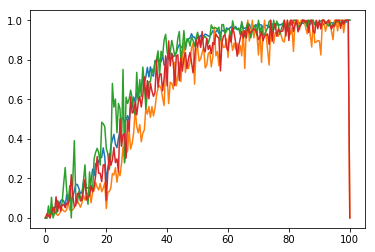

In [24]:
plt.plot(whiteProb)
plt.plot(blackProb)
plt.plot(asianProb)
plt.plot(hispanicProb)

In [25]:
newData = pd.DataFrame(index=totalData.set_index("Score").index)
newData.index.names = ["TransRisk Score"]
newData["white"] = whiteProb
newData["black"] = blackProb
newData["hispanic"] = hispanicProb
newData["asian"] = asianProb
# newData.to_csv("ProbOfBeingGood.csv")

# Here is where you got the NonCumulativeProbabilities.csv - this is the same data. Calculations are from the email on April 8th

In [26]:
newData['white (bad)'] = (1 - newData['white'])
newData['black (bad)'] = (1 - newData['black'])
newData['hispanic (bad)'] = (1 - newData['hispanic'])
newData['asian (bad)'] = (1 - newData['asian'])

In [27]:
newData[['white', 'white (bad)', 'black', 'black (bad)', 'hispanic', 'hispanic (bad)', 'asian', 'asian (bad)']]

,white,white (bad),black,black (bad),hispanic,hispanic (bad),asian,asian (bad)
TransRisk Score,,,,,,,,
0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
0.5,0.000000,1.000000,0.004516,0.995484,0.020619,0.979381,0.000000,1.000000
1.0,0.025629,0.974371,0.021857,0.978143,0.011168,0.988832,0.060680,0.939320
1.5,0.027318,0.972682,0.018501,0.981499,0.000000,1.000000,0.000000,1.000000
2.0,0.042152,0.957848,0.020513,0.979487,0.025424,0.974576,0.104603,0.895397
2.5,0.053597,0.946403,0.020335,0.979665,0.050992,0.949008,0.000000,1.000000
3.0,0.051724,0.948276,0.035758,0.964242,0.028892,0.971108,0.023518,0.976482
3.5,0.059098,0.940902,0.023144,0.976856,0.106548,0.893452,0.023127,0.976873
4.0,0.055910,0.944090,0.012711,0.987289,0.030612,0.969388,0.087719,0.912281


## Percentage of Goods and Bads (totals to 1.0 for each score)

In [28]:
import pandas as pd
import numpy as np
%matplotlib inline

In [29]:
def getPD(goodName, badName, data, raceName):
    pd = data['Score'].to_frame(name="Score")
    race = np.full(len(data), raceName)
    pd["Demographic"] = race
    pd["Good"] = data[goodName].copy()
    pd["Bad"] = data[badName].copy()
    return pd

In [30]:
#section not needed for final tutorial but here for reference currently
data = pd.read_csv("NonCumulativeProbabilities.csv")
whites = getPD('White (Good)', 'White (Bad)', data, "white")
blacks = getPD('Black (Good)', 'Black (Bad)', data, "black")
asians = getPD('Asian (Good)', 'Asian (Bad)', data, "asian")
hispanics = getPD('Hispanic (Good)', 'Hispanic (Bad)', data, "hispanic")

In [31]:
frames = [whites, blacks, asians, hispanics]
totalData = pd.concat(frames)
totalData.rename(columns={'Score' : 'TransRisk Score'}, inplace=True)
totalData.set_index("TransRisk Score", inplace=True)
totalData.head()

,Demographic,Good,Bad
TransRisk Score,,,
0.0,white,0.000000,1.000000
0.5,white,0.000000,1.000000
1.0,white,0.025629,0.974371
1.5,white,0.027318,0.972682
2.0,white,0.042152,0.957848


In [32]:
#used to be TransRiskScores.csv
totalData.to_csv("PercentageOfGoodsAndBads.csv")

# Creating Dataframes for Tutorial

## Probability of Getting a Loan
(this is what I will have them graph initially to see the unfairness)<br/>
**Final Result: P(score >= x | race)**
- probability of getting a loan

**ProbOfBeingScore: P(score = x | race)**
- probability of being a certain transrisk score

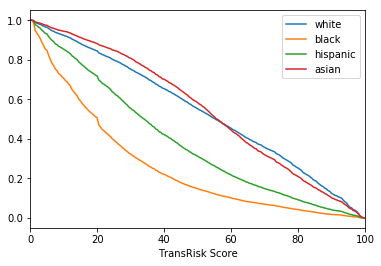

In [33]:
ProbOfBeingScore = (
    pd.read_csv("figure3A.csv")
    .set_index(["Score"]).diff().fillna(0) / 100
)
# ProbOfBeingScore.columns.name = "Demographic"
ProbOfBeingScore.columns = ProbOfBeingScore.columns.str.lower()
ProbOfBeingScore.index.name = "TransRisk Score"
ProbOfBeingScore.to_csv("ProbOfBeingScore.csv")
ProbOfGettingLoan = ProbOfBeingScore.iloc[::-1].cumsum()[::-1]
ProbOfGettingLoan.plot.line()
# ProbOfGettingLoan.to_csv("ProbOfGettingLoan.csv")

In [34]:
ProbOfBeingScore

,white,black,hispanic,asian
TransRisk Score,,,,
0.0,0.0000,0.0000,0.0000,0.0000
0.5,0.0025,0.0112,0.0046,0.0013
1.0,0.0090,0.0414,0.0175,0.0075
1.5,0.0027,0.0114,0.0052,0.0019
2.0,0.0037,0.0142,0.0075,0.0025
2.5,0.0029,0.0138,0.0055,0.0019
3.0,0.0046,0.0193,0.0098,0.0032
3.5,0.0041,0.0162,0.0075,0.0037
4.0,0.0043,0.0176,0.0083,0.0028


In [35]:
ProbOfGettingLoan.to_csv('ProbScoreGreaterThanXGivenRace.csv')

## Calculating ProbLoanReceiverIsGood (What we used to think was Sensitivity) 
(This actually isn't what we want anymore)<br/>
** Final Result (What we used to think was Sensitivity): P(good | score >= x, race) **
- probability of being good if given a loan

** ProbOfBeingGoodAtScore : P(good | score = x, race) **
- probability of being good at a specific score

** ProbOfGettingLoan : P(score >= x | race) **
- probability of getting a loan

** ProbGoodAndLoan : P(good and score >= x | race) **
- probability of being good and getting a loan

**ProbOfBeingScore : P(score = x | race)**
- probability of being a certain transrisk score

** ProbGoodAndScore : P(good and score = x | race) **
- probability that you are good at a certain transrisk score

In [36]:
ProbOfBeingGoodAtScore = (
    pd.read_csv("PercentageOfGoodsAndBads.csv")
    .set_index(["TransRisk Score", "Demographic"])
    .unstack()["Good"]
)
# ProbOfBeingGoodAtScore = (
#     totalData
#     .set_index("Score")
#     .unstack()["Good"]
# )
ProbGoodAndScore = (ProbOfBeingScore * ProbOfBeingGoodAtScore)
ProbGoodAndLoan = ProbGoodAndScore.iloc[::-1].cumsum()[::-1]

In [37]:
# ProbGoodAndLoan.to_csv("ProbGoodAndLoan.csv")

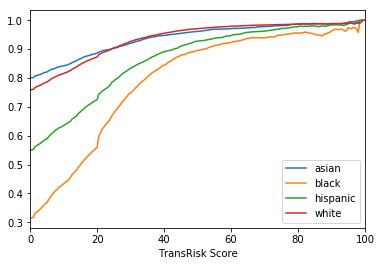

In [38]:
Sensitivity = ProbGoodAndLoan / ProbOfGettingLoan
Sensitivity.plot.line()

In [39]:
Sensitivity.to_csv("ProbLoanReceiverIsGood.csv")

# Checking the validity of the tutorial by cross-checking the actual Sensitivity at 0.82 and the corresponding thresholds

In [40]:
pd.read_csv("Figure7A.csv").head()

,Score,White (Good),White (Bad),Black (Good),Black (Bad),Hispanic (Good),Hispanic (Bad),Asian (Good),Asian (Bad)
0,0.0,0.00,0.04,0.00,0.12,0.00,0.03,0.00,0.00
1,0.5,0.00,1.21,0.02,2.00,0.02,1.17,0.00,0.75
2,1.0,0.03,5.15,0.37,8.68,0.06,5.42,0.06,4.62
3,1.5,0.04,6.38,0.45,10.49,0.06,6.75,0.06,5.58
4,2.0,0.06,7.95,0.56,12.73,0.10,8.59,0.09,6.65


In [41]:
data = pd.read_csv("Figure7A.csv")[["Score", "White (Good)", "Black (Good)", "Hispanic (Good)", "Asian (Good)"]]
data.set_index("Score", inplace=True)

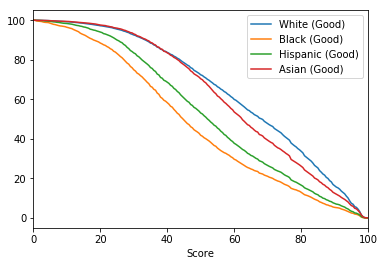

In [42]:
final = (100 - data)
final.to_csv("FinalSolution.csv")
final.plot.line()

In [43]:
closestSensitivity = min(final["White (Good)"], key=lambda x:abs(x-82))
final[final["White (Good)"] == closestSensitivity]

,White (Good),Black (Good),Hispanic (Good),Asian (Good)
Score,,,,
42.0,81.81,54.89,65.51,81.19


In [44]:
closestSensitivity = min(final["Asian (Good)"], key=lambda x:abs(x-82))
final[final["Asian (Good)"] == closestSensitivity]

,White (Good),Black (Good),Hispanic (Good),Asian (Good)
Score,,,,
41.5,82.47,56.03,66.59,81.93


In [45]:
closestSensitivity = min(final["Hispanic (Good)"], key=lambda x:abs(x-82))
final[final["Hispanic (Good)"] == closestSensitivity]

,White (Good),Black (Good),Hispanic (Good),Asian (Good)
Score,,,,
31.0,91.81,73.24,82.02,92.13


In [46]:
closestSensitivity = min(final["Black (Good)"], key=lambda x:abs(x-82))
final[final["Black (Good)"] == closestSensitivity]

,White (Good),Black (Good),Hispanic (Good),Asian (Good)
Score,,,,
26.0,95.1,81.65,89.01,95.64


## @TODO: Creating the shortened data for the article

In [47]:
def getShortened(demographic, data):
    short_g = []
    short_g.append(data.set_index("Score")[0:19.5].Good.mean())
    short_g.append(data.set_index("Score")[20:39.5].Good.mean())
    short_g.append(data.set_index("Score")[40:59.5].Good.mean())
    short_g.append(data.set_index("Score")[60:79.5].Good.mean())
    short_g.append(data.set_index("Score")[80:100].Good.mean())

    short_b = []
    short_b.append(data.set_index("Score")[0:19.5].Bad.mean())
    short_b.append(data.set_index("Score")[20:39.5].Bad.mean())
    short_b.append(data.set_index("Score")[40:59.5].Bad.mean())
    short_b.append(data.set_index("Score")[60:79.5].Bad.mean())
    short_b.append(data.set_index("Score")[80:100].Bad.mean())

    return pd.DataFrame({ 'TransRisk Score' : [10, 30, 50, 70, 90],
        'Demographic' : np.full(5, demographic),
        'Good' : short_g,
        'Bad' : short_b},
            columns=["TransRisk Score", "Demographic", "Good", "Bad"]
                        )

In [48]:
short_w = getShortened("white", whites)
short_b = getShortened("black", blacks)
short_a = getShortened("asian", asians)
short_h = getShortened("hispanic", hispanics)
shortened_data = pd.concat([short_w, short_b, short_a, short_h]).set_index("TransRisk Score")
shortened_data.head()

,Demographic,Good,Bad
TransRisk Score,,,
10,white,0.140804,0.859196
30,white,0.587287,0.412713
50,white,0.899488,0.100512
70,white,0.970315,0.029685
90,white,0.986525,0.013475


In [49]:
# shortened_data.to_csv("ShortenedData.csv")

# Calculations for Loss Function with Demographic Percentage

In [50]:
sizes = [133165, 18274, 14702, 7906]
total = sum(sizes)
DemographicSize = pd.DataFrame(
    { 
    'Demographic' : ['white', 'black', 'hispanic', 'asian'],
    'Sample Size' : sizes,
    'Percentage' : [sizes[0]/total, sizes[1]/total, sizes[2]/total, sizes[3]/total]
    },
    columns=["Demographic", "Sample Size", "Percentage"]
)
DemographicSize.set_index("Demographic").to_csv("ProbOfBeingRace.csv")

### Playing around with making the tables for this visual

![Probabilities](ethicalmldiagram.png)

In [51]:
ProbRace = DemographicSize.set_index("Demographic")
ProbRace.to_csv('ProbRace.csv')

In [52]:
ProbGoodGivenRace = pd.read_csv("ProbGoodGivenRace.csv")

In [53]:
ProbScoreEqualsXGivenRace = ProbOfBeingScore
ProbScoreEqualsXGivenRace.to_csv('ProbScoreEqualsXGivenRace-old.csv')

In [54]:
ProbRaceAndScoreEqualsX = pd.DataFrame({
    'white': ProbRace.Percentage['white'] * ProbScoreEqualsXGivenRace['white'],
    'asian': ProbRace.Percentage['asian'] * ProbScoreEqualsXGivenRace['asian'],
    'black': ProbRace.Percentage['black'] * ProbScoreEqualsXGivenRace['black'],
    'hispanic': ProbRace.Percentage['hispanic'] * ProbScoreEqualsXGivenRace['hispanic'],
})
ProbRaceAndScoreEqualsX.to_csv('ProbRaceAndScoreEqualsX.csv')

In [55]:
ProbRaceAndScoreEqualsX.head()

,asian,black,hispanic,white
TransRisk Score,,,,
0.0,0.000000,0.000000,0.000000,0.000000
0.5,0.000059,0.001176,0.000389,0.001913
1.0,0.000341,0.004347,0.001478,0.006886
1.5,0.000086,0.001197,0.000439,0.002066
2.0,0.000114,0.001491,0.000634,0.002831


In [56]:
ProbOfBeingGoodAtScore.to_csv('ProbGoodGivenRaceAndScoreEqualsX.csv')

In [57]:
ProbScoreEqualsXAndGoodAndRace = ProbRaceAndScoreEqualsX * ProbOfBeingGoodAtScore

In [58]:
ProbScoreEqualsXAndGoodAndRace.to_csv('P(score=xandgoodandrace).csv')

In [59]:
ProbGoodAndRace = pd.DataFrame({
    'white': ProbRace.Percentage['white'] * ProbGoodGivenRace['white'],
    'asian': ProbRace.Percentage['asian'] * ProbGoodGivenRace['asian'],
    'black': ProbRace.Percentage['black'] * ProbGoodGivenRace['black'],
    'hispanic': ProbRace.Percentage['hispanic'] * ProbGoodGivenRace['hispanic'],
})

In [60]:
ProbGoodAndRace

,asian,black,hispanic,white
0,0.03637,0.033091,0.04651,0.58086


In [61]:
ProbGoodAndRace['white'].values[0]

0.58085959841307233

In [62]:
ProbScoreEqualsXGivenGoodAndRace = pd.DataFrame({
    'white': ProbScoreEqualsXAndGoodAndRace['white'] / ProbGoodAndRace['white'].values[0],
    'asian': ProbScoreEqualsXAndGoodAndRace['asian'] / ProbGoodAndRace['asian'].values[0],
    'black': ProbScoreEqualsXAndGoodAndRace['black'] / ProbGoodAndRace['black'].values[0],
    'hispanic': ProbScoreEqualsXAndGoodAndRace ['hispanic'] / ProbGoodAndRace['hispanic'].values[0],
})


ProbScoreEqualsXGivenGoodAndRace.head()

,asian,black,hispanic,white
TransRisk Score,,,,
0.0,0.000000,0.000000,0.000000,0.000000
0.5,0.000000,0.000161,0.000172,0.000000
1.0,0.000568,0.002871,0.000355,0.000304
1.5,0.000000,0.000669,0.000000,0.000097
2.0,0.000327,0.000924,0.000346,0.000205


In [63]:
ProbScoreEqualsXGivenGoodAndRace.to_csv('ProbScoreEqualsXGivenGoodAndRace.csv')

In [64]:
(ProbScoreEqualsXGivenGoodAndRace.cumsum()).to_csv('ProbScoreGreaterThanXGivenGoodAndRace.csv')

# Calculating Actual Precision

In [65]:
ProbScoreGivenRace = ProbOfGettingLoan
ProbRaceAndScore = pd.DataFrame({
    'white': ProbRace.Percentage['white'] * ProbScoreGivenRace['white'],
    'asian': ProbRace.Percentage['asian'] * ProbScoreGivenRace['asian'],
    'black': ProbRace.Percentage['black'] * ProbScoreGivenRace['black'],
    'hispanic': ProbRace.Percentage['hispanic'] * ProbScoreGivenRace['hispanic'],
})
ProbGoodGivenRaceAndScore = pd.read_csv("ProbLoanReceiverIsGood.csv")
ProbGoodGivenRaceAndScore.set_index('TransRisk Score').to_csv('ProbGoodGivenRaceAndScoreGreaterX.csv')
ProbRaceAndScoreAndGood = (ProbGoodGivenRaceAndScore.set_index('TransRisk Score') * ProbRaceAndScore).fillna(value=0)

In [66]:
ProbScoreGreaterX = pd.DataFrame(ProbRaceAndScore.sum(axis=1))
ProbScoreGreaterX.columns=['P(score>=x)']
ProbScoreGreaterX.head()

,P(score>=x)
TransRisk Score,
0.0,0.999842
0.5,0.999842
1.0,0.996305
1.5,0.983254
2.0,0.979465


In [67]:
ProbScoreGreaterXAndGood = pd.DataFrame(ProbRaceAndScoreAndGood.sum(axis=1))
ProbScoreGreaterXAndGood.columns=['P(score>=x & good)']
ProbScoreGreaterXAndGood.head()

,P(score>=x & good)
TransRisk Score,
0.0,0.696829
0.5,0.696829
1.0,0.696816
1.5,0.696507
2.0,0.696429


In [68]:
Precision = pd.DataFrame(
    ProbScoreGreaterXAndGood['P(score>=x & good)'] / 
    ProbScoreGreaterX['P(score>=x)'])
Precision.columns=['Precision']
Precision.head()

,Precision
TransRisk Score,
0.0,0.69694
0.5,0.69694
1.0,0.69940
1.5,0.70837
2.0,0.71103
